In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("loan_train.csv")

In [3]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


<AxesSubplot:xlabel='Area', ylabel='count'>

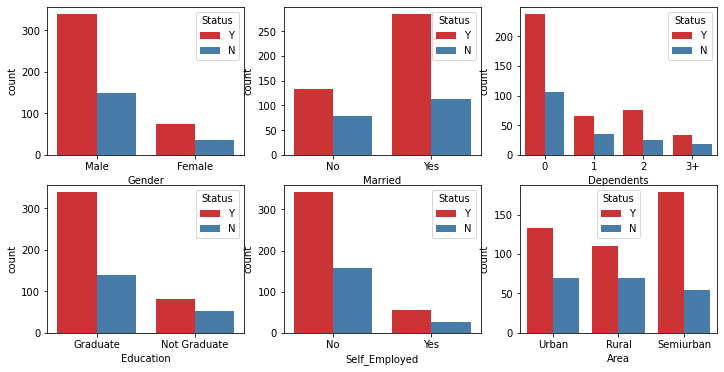

In [4]:
plt.figure(figsize = (12, 6))

plt.subplot(2, 3, 1)
sns.countplot(x = "Gender", hue = "Status", data = df, palette = "Set1")

plt.subplot(2, 3, 2)
sns.countplot(x = "Married", hue = "Status", data = df, palette = "Set1")

plt.subplot(2, 3, 3)
sns.countplot(x = "Dependents", hue = "Status", data = df, palette = "Set1")

plt.subplot(2, 3, 4)
sns.countplot(x = "Education", hue = "Status", data = df, palette = "Set1")

plt.subplot(2, 3, 5)
sns.countplot(x = "Self_Employed", hue = "Status", data = df, palette = "Set1")

plt.subplot(2, 3, 6)
sns.countplot(x = "Area", hue = "Status", data = df, palette = "Set1")

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

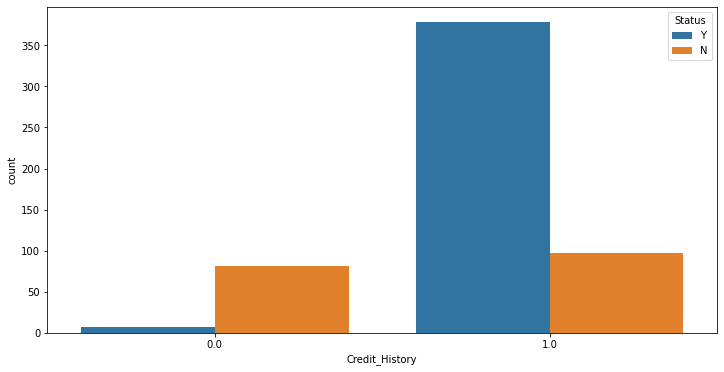

In [5]:
plt.figure(figsize = (12, 6))

sns.countplot(x = "Credit_History", hue = "Status", data = df)

<AxesSubplot:xlabel='Status', ylabel='Term'>

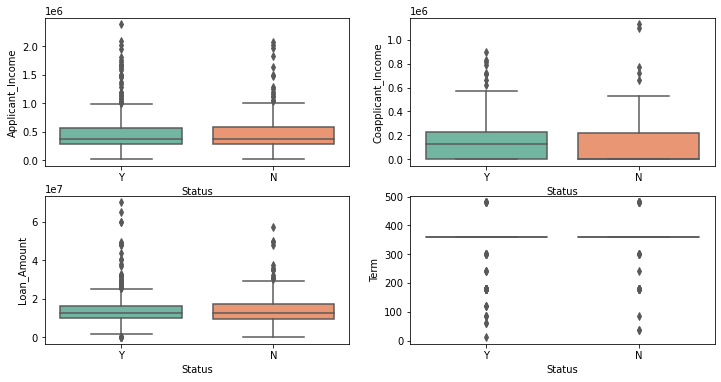

In [6]:
plt.figure(figsize = (12, 6))

plt.subplot(2, 2, 1)
sns.boxplot(x = "Status", y = "Applicant_Income", data = df[df["Applicant_Income"] < 3000000], palette = "Set2")

plt.subplot(2, 2, 2)
sns.boxplot(x = "Status", y = "Coapplicant_Income", data = df[df["Coapplicant_Income"] < 2000000], palette = "Set2")

plt.subplot(2, 2, 3)
sns.boxplot(x = "Status", y = "Loan_Amount", data = df, palette = "Set2")

plt.subplot(2, 2, 4)
sns.boxplot(x = "Status", y = "Term", data = df, palette = "Set2")

<AxesSubplot:xlabel='Applicant_Income', ylabel='Coapplicant_Income'>

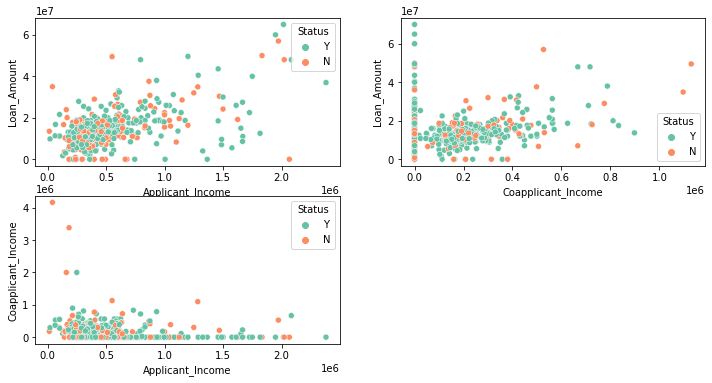

In [7]:
plt.figure(figsize = (12, 6))

plt.subplot(2, 2, 1)
sns.scatterplot(y = "Loan_Amount",hue = "Status", x = "Applicant_Income", data = df[df["Applicant_Income"] < 3000000], palette = "Set2")

plt.subplot(2, 2, 2)
sns.scatterplot(y = "Loan_Amount",hue = "Status", x = "Coapplicant_Income", data = df[df["Coapplicant_Income"] < 2000000], palette = "Set2")

plt.subplot(2, 2, 3)
sns.scatterplot(y = "Coapplicant_Income",hue = "Status", x = "Applicant_Income", data = df[df["Applicant_Income"] < 3000000], palette = "Set2")



## Feature engineering

In [8]:
X = df.drop("Status", axis = 1)
y = df["Status"]

X["Self_Employed"] = np.where(X["Self_Employed"] == "Yes", 1, np.where(X["Self_Employed"].isna(), X["Self_Employed"], 0))
X["Married"] = np.where(X["Married"] == "Yes", 1, np.where(X["Married"].isna(), X["Married"], 0))
X["Male"] = np.where(X["Gender"] == "Male", 1, np.where(X["Gender"].isna(), X["Gender"], 0))
X["Graduate"] = np.where(X["Education"] == "Graduate", 1, np.where(X["Education"].isna(), X["Education"], 0))

X.drop(["Gender", "Education"], inplace = True, axis = 1) 

<AxesSubplot:>

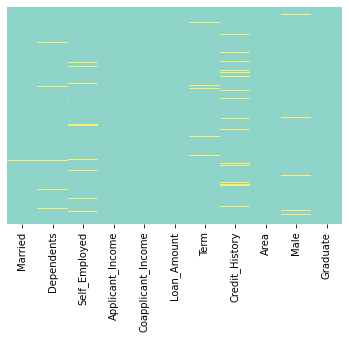

In [9]:
sns.heatmap(X.isna(), cmap = "Set3", yticklabels=False, cbar = False)

In [10]:
X["Dependents"][X["Dependents"].isna()] = 0

X["Credit_History"][X["Credit_History"].isna()] = 0

In [11]:
Dependents = pd.get_dummies(X["Dependents"], drop_first = True)
Area = pd.get_dummies(X["Area"], drop_first = True)

X = X.drop(["Dependents", "Area"], axis = 1)

X = pd.concat([Dependents,X,Area], axis = 1)

In [12]:
imp = IterativeImputer(max_iter=10, random_state=923)
imp.fit(X)

IterativeImputer(random_state=923)

In [13]:
X_imp = pd.DataFrame(np.round(imp.transform(X)), columns = X.columns)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_imp, y, random_state=834, train_size = 0.8)

In [15]:
rf_model = RandomForestClassifier(n_estimators = 200, random_state=234)

rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=234)

In [16]:
pred = rf_model.predict(X_test)

In [17]:
sum(pred == y_test)/(y_test.shape[0])

0.7642276422764228

In [18]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[19 19]
 [10 75]]
              precision    recall  f1-score   support

           N       0.66      0.50      0.57        38
           Y       0.80      0.88      0.84        85

    accuracy                           0.76       123
   macro avg       0.73      0.69      0.70       123
weighted avg       0.75      0.76      0.75       123



In [19]:
rf_model.feature_importances_

array([0.02270098, 0.01707741, 0.01450957, 0.01247046, 0.02665095,
       0.02414031, 0.21309878, 0.12928191, 0.20623457, 0.05724938,
       0.16296975, 0.02492656, 0.02843674, 0.03448568, 0.02576697])

In [20]:
rf_model.feature_names_in_

array(['0', '1', '2', '3+', 'Married', 'Self_Employed',
       'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term',
       'Credit_History', 'Male', 'Graduate', 'Semiurban', 'Urban'],
      dtype=object)

In [21]:
feats = rf_model.feature_names_in_[rf_model.feature_importances_ > 0.024]

In [22]:
feats

array(['Married', 'Self_Employed', 'Applicant_Income',
       'Coapplicant_Income', 'Loan_Amount', 'Term', 'Credit_History',
       'Male', 'Graduate', 'Semiurban', 'Urban'], dtype=object)

In [23]:
X_2 = X_imp[feats]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y, random_state=834, train_size = 0.8)

In [25]:
rf_model2 = RandomForestClassifier(n_estimators = 200, random_state=341128)

rf_model2.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=341128)

In [26]:
pred2 = rf_model2.predict(X_test)

In [27]:
sum(pred2 == y_test)/(y_test.shape[0])

0.7479674796747967

In [28]:
print(confusion_matrix(y_test, pred2))
print(classification_report(y_test, pred2))

[[19 19]
 [12 73]]
              precision    recall  f1-score   support

           N       0.61      0.50      0.55        38
           Y       0.79      0.86      0.82        85

    accuracy                           0.75       123
   macro avg       0.70      0.68      0.69       123
weighted avg       0.74      0.75      0.74       123



In [29]:
import pickle

In [30]:
pickle.dump(rf_model, open('rf_model.pkl', 'wb'))